In [ ]:
# Install all the dependencies through requirements.txt 

In [ ]:
# !pip install -r requirements.txt

In [ ]:
# References
# http://scikit-learn.org/stable/modules/classes.html
# http://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression


In [ ]:
# All Imports

In [192]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



In [193]:
### Read from SuperFan CSV Example dataset

In [194]:
columns = ['RiskFactor','Loss','Make','FT','Asprtn','Door','BS','Drive','EngineLoc',
           'WB','Len','Wdth','Hght','Curbwt','EngineType','Cyl','EngineSize',
           'FS','Bore','Stroke','CmprRatio','HP','PeakRpm','Citympg','Hwympg','Price']

# dataset = pd.read_csv('Auto_data.csv', names = columns)
dataset = pd.read_csv('Auto_data.csv')


# summarize the number of rows and columns in the dataset
print('Before removing missing values:', dataset.shape)

dataset = dataset.replace('?', np.NaN)

# drop rows with missing values
dataset.dropna(inplace=True)

print(dataset)

# summarize the number of rows and columns in the dataset
print('After removing missing values:', dataset.shape)

print(dataset.describe())

Before removing missing values: (204, 26)
     -2  103          volvo     gas    std  4        sedan  rwd  front  104.3  \
0    -2  103          volvo     gas    std  4        sedan  rwd  front  104.3   
1    -2  103          volvo     gas  turbo  4        sedan  rwd  front  104.3   
2    -1  110          dodge     gas    std  4        wagon  fwd  front  103.3   
3    -1   93  mercedes-benz  diesel  turbo  4        sedan  rwd  front  110.0   
4    -1   93  mercedes-benz  diesel  turbo  4        wagon  rwd  front  110.0   
5    -1   93  mercedes-benz  diesel  turbo  4        sedan  rwd  front  115.6   
7    -1  137     mitsubishi     gas    std  4        sedan  fwd  front   96.3   
8    -1   74       plymouth     gas    std  4        wagon  fwd  front  103.3   
9    -1   65         toyota     gas    std  4        sedan  fwd  front  102.4   
10   -1   65         toyota  diesel  turbo  4        sedan  fwd  front  102.4   
11   -1   65         toyota     gas    std  4    hatchback  fwd  fr

In [195]:
# Create a label (category) encoder object

dataset = dataset.apply(preprocessing.LabelEncoder().fit_transform)

In [196]:
### Visualization of the dataset

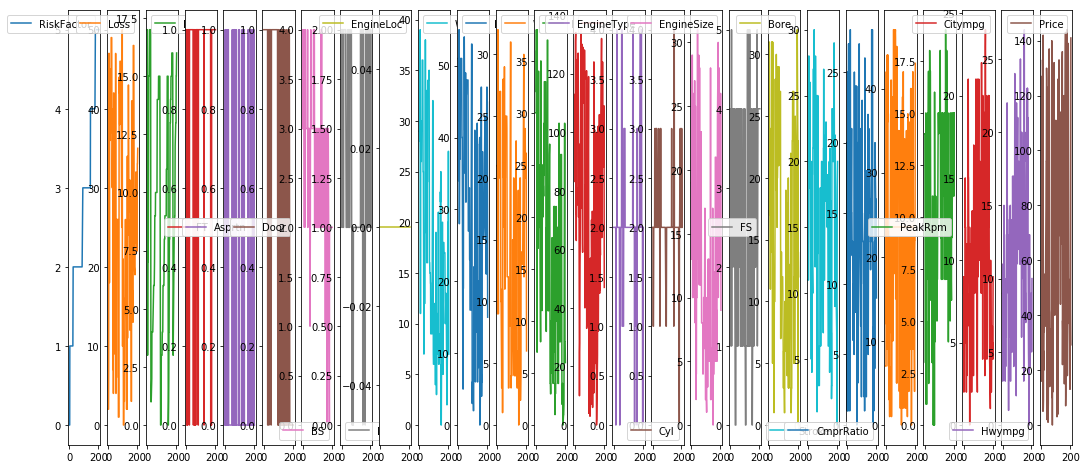

In [172]:
dataset.plot(kind='line', subplots=True, layout=(1, 26), sharex=False, sharey=False, figsize=(18, 8))
plt.show()

In [197]:
columns = ['Loss','Make','FT','Asprtn','Door','BS','Drive','EngineLoc',
           'WB','Len','Wdth','Hght','Curbwt','EngineType','Cyl','EngineSize',
           'FS','Bore','Stroke','CmprRatio','HP','PeakRpm','Citympg','Hwympg','Price']

# If you also want to see RiskFactor column in matrix uncomment this line
pd.plotting.scatter_matrix(dataset[columns], c=dataset["RiskFactor"], figsize=(10, 10), marker='.', cmap='brg',
                                   hist_kwds={'bins': 20}, s=60, alpha=.8)

labels=["Normal Fan", "Missing Data","RiskFactor"]
plt.legend(handles, labels, loc=(1.03,0))

plt.show()

KeyError: "['Loss' 'Make' 'FT' 'Asprtn' 'Door' 'BS' 'Drive' 'EngineLoc' 'WB' 'Len'\n 'Wdth' 'Hght' 'Curbwt' 'EngineType' 'Cyl' 'EngineSize' 'FS' 'Bore'\n 'Stroke' 'CmprRatio' 'HP' 'PeakRpm' 'Citympg' 'Hwympg' 'Price'] not in index"

In [198]:
# Dataset

numpy_dataset = dataset.values

In [199]:
X = numpy_dataset[:,1:26]
Y = numpy_dataset[:,0]

print(X)
print(Y)

[[  2  17   1 ...,   9   9  27]
 [  2  17   1 ...,   2   3  44]
 [  7   3   1 ...,   9  11 126]
 ..., 
 [ 33  15   1 ...,   5   5  31]
 [ 33  15   1 ...,   4   5  28]
 [ 35  16   1 ...,   9  10 140]]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 5]


In [206]:
# Data Split
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size= 0.30)

In [207]:
## Prediction logic
def predict(X_validation, Y_validation, algorithm, model):
    # Prediction Report
    predictions = model.predict(X_validation)
    # print('y_validation', Y_validation)
    # print('predictions', predictions)
    #print('Accuracy score:', algorithm, accuracy_score(Y_validation, predictions))
    # print('Confusion Matrix', confusion_matrix(Y_validation, predictions))

    # Explained variance score: 1.0 is perfect prediction
    print('Variance score: %.2f' %r2_score(Y_validation, predictions))
    print('Explained Variance score: %.2f' %explained_variance_score(Y_validation, predictions))
    print('Mean Absolute Error: %.2f' %mean_absolute_error(Y_validation, predictions))
    print('Mean Squared Error: %.2f' %mean_squared_error(Y_validation, predictions))
    print('Mean Squared_log Error: %.2f' %mean_squared_log_error(Y_validation, predictions))
    print('Median Absolute Error: %.2f' %median_absolute_error(Y_validation, predictions))
    
    r2_score

In [208]:
# Cross Validation Result
def build_cross_validation_result(X_train, Y_train, algo, model):
    kfold = model_selection.KFold(n_splits = 10, random_state = 7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    # print('cv_results:', cv_results)
    result = "Cross Verification Result -> %s:  %0.4f (+/- %0.4f)" % (algo, cv_results.mean(), cv_results.std()*2)
    print(result)

In [209]:
## Decision Tree: CART
decisionTreeModel = DecisionTreeRegressor()

build_cross_validation_result(X_train, Y_train, 'Decision Tree', decisionTreeModel)

# Model built
decisionTreeModel.fit(X_train, Y_train)

# Predict
predict(X_validation, Y_validation, 'Decision Tree', decisionTreeModel)
    

Cross Verification Result -> Decision Tree:  0.7038 (+/- 0.3504)
Variance score: 0.80
Explained Variance score: 0.81
Mean Absolute Error: 0.19
Mean Squared Error: 0.25
Mean Squared_log Error: 0.01
Median Absolute Error: 0.00


In [210]:
## LinearRegression
linearRegressionModel = LinearRegression()

# Model built
linearRegressionModel.fit(X_train, Y_train)

# Predict
predict(X_validation, Y_validation, 'Linear Regression Model', linearRegressionModel)

Variance score: 0.65
Explained Variance score: 0.65
Mean Absolute Error: 0.56
Mean Squared Error: 0.45
Mean Squared_log Error: 0.04
Median Absolute Error: 0.50


In [211]:
## Bayesian Ridge Regression
bayesianRidgeModel = linear_model.BayesianRidge()

# Model built
bayesianRidgeModel.fit(X_train, Y_train)

# Predict
predict(X_validation, Y_validation, 'Bayesian Ridge Regression', bayesianRidgeModel)

Variance score: 0.17
Explained Variance score: 0.23
Mean Absolute Error: 0.82
Mean Squared Error: 1.06
Mean Squared_log Error: 0.07
Median Absolute Error: 0.70
